In [24]:
#Implementing Black-Scholes in different Settings
# Black-Scholes Option Pricing Formula

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt  


def black_scholes(S, K, T, r, sigma, option_type="call"):
    """
    Calculate the Black-Scholes option price for a European call or put option.

    Parameters:
        S (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate (annualized, as a decimal)
        sigma (float): Volatility of the stock (annualized, as a decimal)
        option_type (str): "call" for a call option, "put" for a put option

    Returns:
        float: Option price
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        # Call option price
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        # Put option price
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option_type. Use 'call' or 'put'.")

    return price

# Example usage
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free interest rate (5%)
sigma = 0.2  # Volatility (20%)

call_price = black_scholes(S, K, T, r, sigma, option_type="call")
put_price = black_scholes(S, K, T, r, sigma, option_type="put")

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")






Call Option Price: 10.45
Put Option Price: 5.57


In [25]:
import numpy as np

def monte_carlo_option_pricing(S, K, T, r, sigma, option_type="call", num_simulations=100000):
    """
    Calculate the option price using Monte Carlo simulation.

    Parameters:
        S (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate (annualized, as a decimal)
        sigma (float): Volatility of the stock (annualized, as a decimal)
        option_type (str): "call" for a call option, "put" for a put option
        num_simulations (int): Number of Monte Carlo simulations

    Returns:
        float: Option price
    """
    # Simulate end-of-period stock prices
    np.random.seed(0)  # For reproducibility
    Z = np.random.standard_normal(num_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calculate the payoff for each simulation
    if option_type == "call":
        payoffs = np.maximum(ST - K, 0)
    elif option_type == "put":
        payoffs = np.maximum(K - ST, 0)
    else:
        raise ValueError("Invalid option_type. Use 'call' or 'put'.")

    # Discount the average payoff back to present value
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

# Example usage
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free interest rate (5%)
sigma = 0.2 # Volatility (20%)

call_price_mc = monte_carlo_option_pricing(S, K, T, r, sigma, option_type="call")
put_price_mc = monte_carlo_option_pricing(S, K, T, r, sigma, option_type="put")

print(f"Call Option Price (Monte Carlo): {call_price_mc:.2f}")
print(f"Put Option Price (Monte Carlo): {put_price_mc:.2f}")


Call Option Price (Monte Carlo): 10.43
Put Option Price (Monte Carlo): 5.54


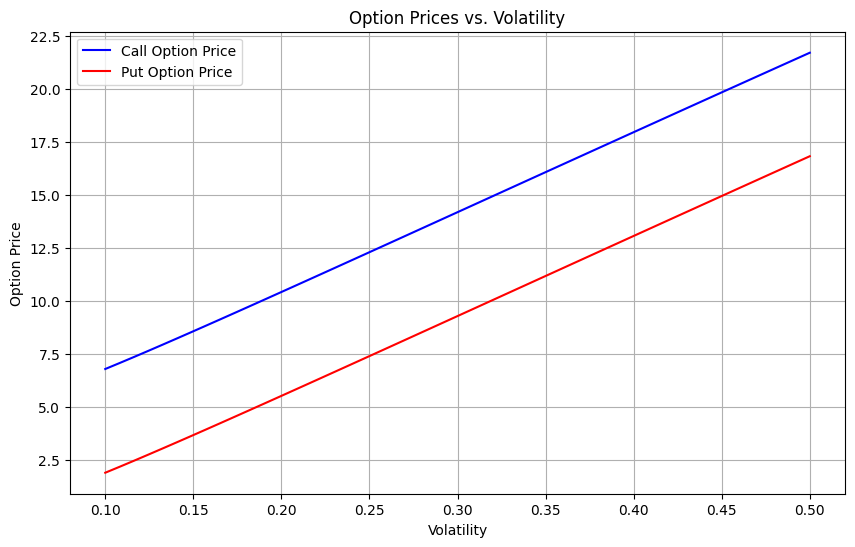

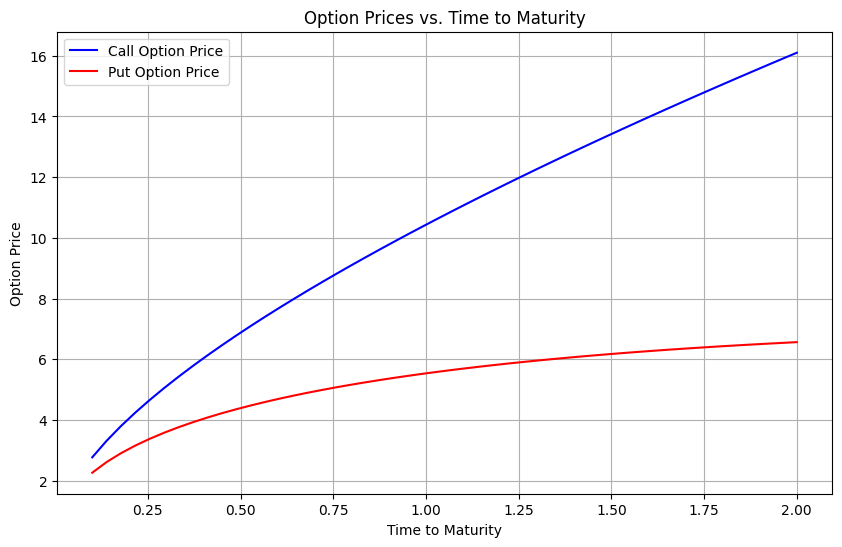

In [26]:
volatilities = np.linspace(0.1, 0.5, 50)
call_prices_vol = [monte_carlo_option_pricing(S, K, T, r, sigma, option_type="call") for sigma in volatilities]
put_prices_vol = [monte_carlo_option_pricing(S, K, T, r, sigma, option_type="put") for sigma in volatilities]

plt.figure(figsize=(10, 6))
plt.plot(volatilities, call_prices_vol, label="Call Option Price", color="blue")
plt.plot(volatilities, put_prices_vol, label="Put Option Price", color="red")
plt.title("Option Prices vs. Volatility")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()

# Plotting option prices for different times to maturity
times_to_maturity = np.linspace(0.1, 2, 50)
call_prices_T = [monte_carlo_option_pricing(S, K, T, r, sigma, option_type="call") for T in times_to_maturity]
put_prices_T = [monte_carlo_option_pricing(S, K, T, r, sigma, option_type="put") for T in times_to_maturity]

plt.figure(figsize=(10, 6))
plt.plot(times_to_maturity, call_prices_T, label="Call Option Price", color="blue")
plt.plot(times_to_maturity, put_prices_T, label="Put Option Price", color="red")
plt.title("Option Prices vs. Time to Maturity")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()

In [1]:
from scipy import integrate
import numpy as np
import cmath
import math

def integrand(z, k, sigma, T):
    """
    Fourier-based integrand for call option pricing.
    """
    # Fourier transform term e^{izk} * characteristic function \varphi(z - i/2)
    def charfunction1(z,k,sigma,T):
        return cmath.exp(-0.5 * sigma**2 * T**2 * (z - 0.5j)**2)* cmath.exp(-0.5j * sigma**2 *T**2*(z-0.5j))
    def charfunction2(z,k,sigma,T): 
        return cmath.exp(-0.5 * sigma**2 * T * (z - 0.5j)**2)
    
    complex_exponent = cmath.exp(1j * z * k) * charfunction2(z,k,sigma,T)
    # Real part of the integrand
    real_exponent = complex_exponent.real
    
    # Denominator from the formula
    denominator = z**2 + 0.25
    
    return real_exponent / denominator

# Parameters
S = 100         # Spot price
K = 100         # Strike price
T = 1           # Time to maturity in years
r = 0.05        # Risk-free interest rate (5%)
sigma = 0.2     # Volatility (20%)
k = math.log(S / K) + r * T  # Log-moneyness + drift term

# Numerical integration for the Fourier inversion
result, error = integrate.quad(lambda z: integrand(z, k, sigma, T), 0, np.inf)
call_price1= S - ((K*np.exp(-r*T))/(2*math.pi))*result 
call_price = S - math.sqrt((S*K*np.exp(-r*T))/(2*math.pi))*result 

print(f"call_price1:{call_price1}")

print(f"call_price:{call_price}")
print(f"Integral result: {result}")
print(f"Estimated error: {error}")

#Die Implementierung mit der Analytischen Lösung und Monte-Carlo-Sampling scheinen zu funktionieren
#bei der numerischen Integration kommt immer was negatives raus...habe dann noch verschiedene Sachen rausprobiert ob irgendwann was sinnvolles
#rauskommt, aber das hat irgendwie nicht geklappt...

call_price1:55.99132946439056
call_price:-13.105974350309097
Integral result: 2.9069184044951797
Estimated error: 3.303779898082862e-10
